# Data Classification
The MAGIC gamma telescope dataset:
https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope, it generated to simulate
registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma
telescope using the imaging technique allowing to discriminate statistically the information
caused by primary gammas (signal) from the images of hadronic showers
initiated by cosmic rays in the upper atmosphere (background).
It is required to investigate the data deeper, split into train and test data with class labels
g = gamma (signal) and h = hadron (background). You are asked to apply preprocessing and feature
selection techniques and construct classification models using different approaches such as Decision
Trees, AdaBoost, K-Nearest Neighbor (K-NN) and Logistic Regression and compare the results
between them and between with and without applying preprocessing and feature selection. Moreover,
you should evaluate and test the classification models accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background) 

g = gamma (signal): 12332 
h = hadron (background): 6688 


## Reading Data

In [2]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Visualization

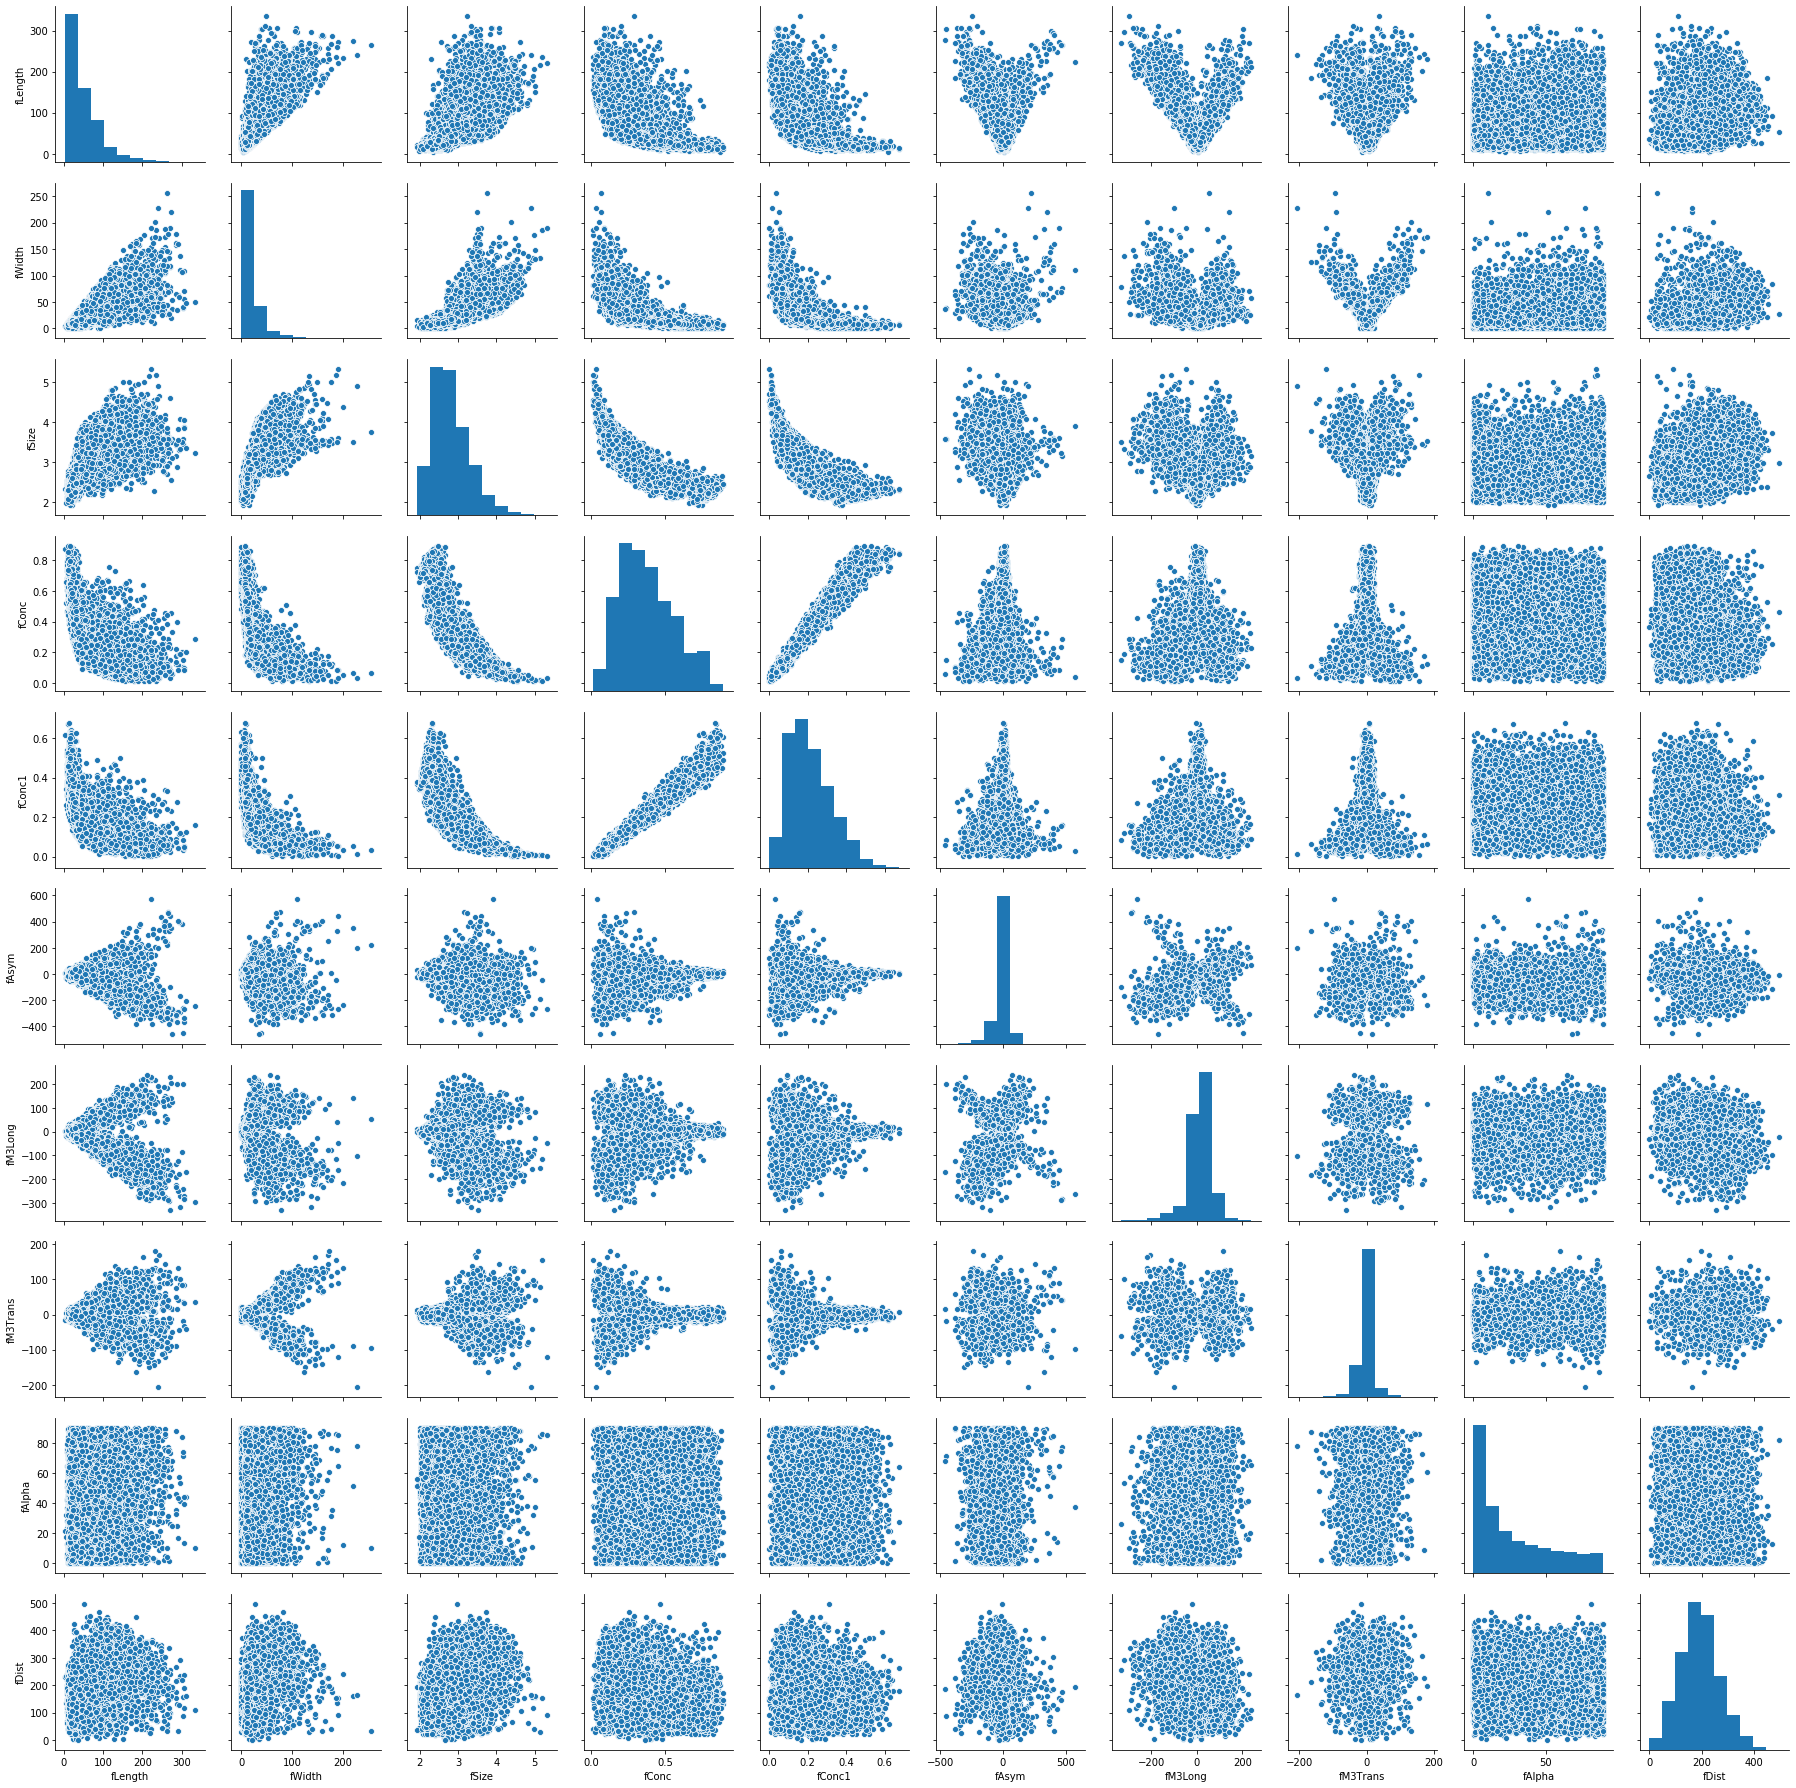

In [5]:
df = data.copy()
sns.pairplot(data=df)

In [ ]:
corr = df.drop(labels='class',axis=1).corr()
sns.heatmap(data=corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.5,annot=True)

In [ ]:
newdf = df.replace({'g':1,'h':0})
sns.heatmap(newdf.corr(),xticklabels=newdf.columns,yticklabels=newdf.columns,annot=True,linewidths=0.5)

In [ ]:
newdf['class'].plot.hist()

In [ ]:
sns.boxplot(data=newdf,x='class',y='fLength')

In [ ]:
sns.boxplot(data=newdf,x='class',y='fWidth')

In [ ]:
sns.boxplot(data=newdf,x='class',y='fSize')

## Tunning Functions

In [ ]:
def knn():
    neigh_score =[]
    for i in range(1,30,1):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        pred = knn.predict(X_test)
        score = accuracy_score(Y_test,pred)
        neigh_score.append((i, score))
    k = max(neigh_score,key=lambda x:x[1])[0]
    knn = KNeighborsClassifier(n_neighbors=k)
    return knn

In [ ]:
def lg_reg():
    penalty_score = []
    penalty_options = ['l1', 'l2']
    for i in penalty_options:
        logstic_model = LogisticRegression(penalty=i)
        logstic_model.fit(X_train,Y_train)
        pred = logstic_model.predict(X_test)
        score = accuracy_score(Y_test,pred)
        penalty_score.append((i, score))
    pen = max(penalty_score,key=lambda x:x[1])[0]
    logstic_model = LogisticRegression(penalty=pen)
    return logstic_model

In [ ]:
def rand_forest():
    params =[]
    for i in ['gini','entropy']:
        for j in range(1,100,1):
            forest = RandomForestClassifier(n_estimators=j, max_depth=2,random_state=0,criterion=i)
            forest.fit(X_train,Y_train)
            pred = forest.predict(X_test)
            score = accuracy_score(Y_test,pred)
            params.append((i,j,score))
    heighest = max(params,key=lambda x:x[2])
    forest = RandomForestClassifier(n_estimators=heighest[1], max_depth=2,random_state=0,criterion=heighest[0])
    return forest

In [ ]:
def ada_boost():
    params = []
    for i in range(1,100,1):
        clf = AdaBoostClassifier(n_estimators=i, random_state=0)
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_test)
        score = accuracy_score(Y_test,pred)
        params.append((i,score))

    clf = AdaBoostClassifier(n_estimators=max(params,key=lambda x:x[1])[0], random_state=0)
    return clf

In [ ]:
def dec_tree():
    tree = DecisionTreeClassifier(criterion='entropy')
    return tree

In [ ]:
# models = {"Naive Bayes":GaussianNB(), "KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(), "Ada Boost": AdaBoostClassifier(), "Decision Tree": DecisionTreeClassifier()}
tunning = {"Naive Bayes":GaussianNB(), "KNN": knn(), "Logistic Regression": lg_reg(), "Random Forest": rand_forest(), "Ada Boost": ada_boost(), "Decision Tree": dec_tree()}

## Without Preprocessing or feature selection

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
X_train.head()
# print(X.shape)

In [ ]:
# model = GaussianNB()
for name in tunning:
    model = models[name]
    y_pred = model.fit(X_train, Y_train).predict(X_train)
    
    print(name)
    print("Number of mislabeled points %d out of %d total points."% ((Y_train != y_pred).sum(), X_train.shape[0]))
    r = precision_recall_fscore_support(Y_train, y_pred)
    print("precision: ",str( (r[0][0]+r[0][1])/2 ), "\t Recall: ", str( (r[1][0]+r[1][1])/2 ), "\t FScore: ", str( (r[2][0]+r[2][1])/2 ))
    print("Model accuracy =" , model.score(X_test,Y_test))   
    print("=======================================")
    
    # plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, roc_auc))
    # print(X.shape)

## With Preprocessing and feature selection

In [335]:
def best_k(X):
    err = X.shape[0]
    best_val = 2
    
    for i in range(1, X.shape[1]):
    
        X_new = SelectKBest(f_classif, k=i).fit_transform(X, Y)
        model = GaussianNB()
        y_pred = model.fit(X_new, Y).predict(X_new)
        num = (Y != y_pred).sum()
        if num < err :
            err = num
            best_val = i
    
    return best_val

In [336]:
# print(X.shape)
X = preprocessing.StandardScaler().fit_transform(X)
K = best_k(X)
# print(K)

X_new = SelectKBest(f_classif, k=K).fit_transform(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, train_size=0.7)

for name in models:
    model = models[name]
    y_pred = model.fit(X_train, Y_train).predict(X_train)
    
    print(name)
    print("Number of mislabeled points %d out of %d total points."% ((Y_train != y_pred).sum(), X_train.shape[0]))
    r = precision_recall_fscore_support(Y_train, y_pred)
    print("precision: ",str( (r[0][0]+r[0][1])/2 ), "\t Recall: ", str( (r[1][0]+r[1][1])/2 ), "\t FScore: ", str( (r[2][0]+r[2][1])/2 ))
    print("Model accuracy =" , model.score(X_test,Y_test))   
    print("=======================================")

Naive Bayes
Number of mislabeled points 3132 out of 13314 total points.
precision:  0.754098353310651 	 Recall:  0.710179181727037 	 FScore:  0.7214076632693629
Model accuracy = 0.7674377847879426
KNN
Number of mislabeled points 2000 out of 13314 total points.
precision:  0.8460105903097643 	 Recall:  0.8188172376823479 	 FScore:  0.8293191760636413
Model accuracy = 0.7982825096389765
Logistic Regression
Number of mislabeled points 2804 out of 13314 total points.
precision:  0.7823942926065348 	 Recall:  0.7413662764503743 	 FScore:  0.7535429387230674
Model accuracy = 0.7928496319663512


/home/muhammad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Random Forest
Number of mislabeled points 268 out of 13314 total points.
precision:  0.9830057486610275 	 Recall:  0.9730692128183173 	 FScore:  0.9777368572689857
Model accuracy = 0.7975814931650894
Ada Boost
Number of mislabeled points 2484 out of 13314 total points.
precision:  0.8074677223874651 	 Recall:  0.7732029726010363 	 FScore:  0.7848838600959374
Model accuracy = 0.8094987732211707
Decision Tree
Number of mislabeled points 0 out of 13314 total points.
precision:  1.0 	 Recall:  1.0 	 FScore:  1.0
Model accuracy = 0.7481598317560463
